In [32]:
import numpy as np
import pandas as pd
df = pd.read_csv('cmc_train.csv')

train_labels = df['label']
train_labels = np.array(train_labels)
print(train_labels)

train_features = df.iloc[:,:9]
train_features = np.array(train_features)
print(train_features)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)

df = pd.read_csv('cmc_test（降噪）.csv')

test_labels = df['label']
test_labels = np.array(test_labels)
print(test_labels)

test_features = df.iloc[:,:9]
test_features = np.array(test_features)
print(test_features)

print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

[1 1 1 ... 3 3 3]
[[24  2  3 ...  2  3  0]
 [45  1  3 ...  3  4  0]
 [43  2  3 ...  3  4  0]
 ...
 [39  3  3 ...  1  4  0]
 [33  3  3 ...  2  2  0]
 [17  3  3 ...  2  4  0]]
train_features (1327, 9)
train_labels (1327,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[[0.09090909 0.0625     4.         4.         1.         1.
  1.         3.         0.        ]
 [0.6969697  0.125      4.         4.         1.         0.
  1.         4.         0.        ]
 [1.         0.5625     3.         4.         1.         1.
  1.         4.         0.        ]
 [0.54545455 0.125      4.         4.         0.         1.
  1.         4.         0.        ]
 [0.36363636 0.0625     4.         4.         0.         1.
  2.         4.         0.        ]
 [0.27272727 0.         4.         4.         

In [33]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-147
    for nearest_neighbor in range(1,int(600 * 0.1)):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy >= rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)

rel_knn_algorithm： brute
rel_weight： distance
rel_nearest_neighbor： 1


**********************Result**********************
Training time cost 0.0019958019256591797 s
Test time cost 0.004989147186279297 s
knn_algorithm = brute ,nearest_neighbors = 1 ,weight = distance ,accuracy= 0.6144578313253012


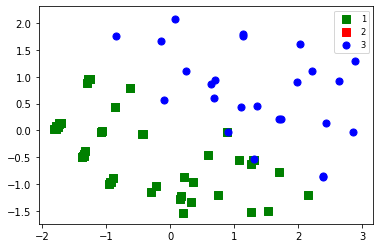

In [34]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1, data2):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]
    c = np.shape(data2)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
    for cc in range(c):
        axis_x2.append(data2[cc,0])
        axis_y2.append(data2[cc,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2,s=50, c='blue')


    
    #plt.xlabel('x1'); plt.ylabel('x2');
    # ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
    # ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
    # ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
    # ax.scatter(axis_x1, axis_y1,axis_z1,  c='red', marker='s')
    # ax.scatter(axis_x2, axis_y2, axis_z2, c='blue')
    plt.legend(fontsize='small',labels=[ '1','2','3'])  
    plt.savefig("knn-matplotlib.png")
    plt.show()
    
print('**********************Result**********************')
time_start = time.time()

#创建一个K临近算法的模板
clf = neighbors.KNeighborsClassifier(n_neighbors = rel_nearest_neighbor, weights=rel_weight,
                                     algorithm=rel_knn_algorithm)

#fit函数 使用train_features作为训练数据，train_labels作为目标值（类似于标签）来拟合模型。
clf = clf.fit(train_features, train_labels)
time_end = time.time()
print('Training time cost',time_end-time_start,'s')
time_start = time.time()

#调用predict函数进行预测
label_predict = clf.predict(test_features)
time_end = time.time()
print('Test time cost',time_end-time_start,'s')
accuracy = np.sum(label_predict == test_labels) / label_predict.shape[0]
#print(label_predict)
print('knn_algorithm =',rel_knn_algorithm,',nearest_neighbors =', rel_nearest_neighbor,',weight =',rel_weight,  ',accuracy=', accuracy)

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit(X_pca[label_predict == 1],X_pca[label_predict == 2],X_pca[label_predict == 3])

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score
"""预测结果"""
print("Predict_rlt:",label_predict)
"""预测准确个数"""
print("Correct_no:",sum(label_predict==test_labels))
"""预测准确率"""
print("Accuracy:",sum(label_predict==test_labels)/len(test_labels))

#以下代码用交叉验证的方法计算KNN在该数据集分类预测中的准确性
knn = KNeighborsClassifier(n_neighbors=1)
score_knn_accuracy = np.mean(cross_val_score(estimator=knn, X=train_features, y=train_labels, cv=5, scoring='accuracy'))
print("Score_accuracy:",score_knn_accuracy)

F1_score = f1_score( test_labels, label_predict, average='micro' )
precision = precision_score(test_labels, label_predict, average='micro')
recall = recall_score(test_labels, label_predict, average='micro')

print("F1_score：",F1_score)
print("precision：",precision)
print("recall：",recall)

Predict_rlt: [1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1 1 3 3 3 3 1 1 3 3 3 3 3 3 1 3 1 3 1 3 1
 3 1 3 1 3 3 3 1 3]
Correct_no: 51
Accuracy: 0.6144578313253012
Score_accuracy: 0.4649794297063413
F1_score： 0.6144578313253012
precision： 0.6144578313253012
recall： 0.6144578313253012
